In this notebook we perform
1. Feature Engineering
2. Feature Selection
3. Modelling

In [2]:
# !pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.4 MB/s eta 0:00:0000:0100:01


In [4]:
# !pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 6.8 MB/s eta 0:00:00


In [8]:
#basic imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
sns.set_palette('viridis')
mpl.rcParams['figure.figsize'] = 6,4


# Modelling imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


-------------------------


In [11]:
df = pd.read_csv('/Users/parthrajauria/Documents/MYPersonalProjects/EndToEndMLOPsProject/notebook/data/Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [12]:
# Target Variable would be GPA
df.drop(['GradeClass','StudentID'], axis=1, inplace=True)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [13]:
df.shape


(2392, 13)

# 5.1 LOG/FUNCTION TRANSFORMATIONS NEEDED?


In [14]:
data = df.copy()


In [15]:
# Getting this information from EDA notebook.
continuous_feature = ['StudyTimeWeekly', 'Absences', 'GPA']


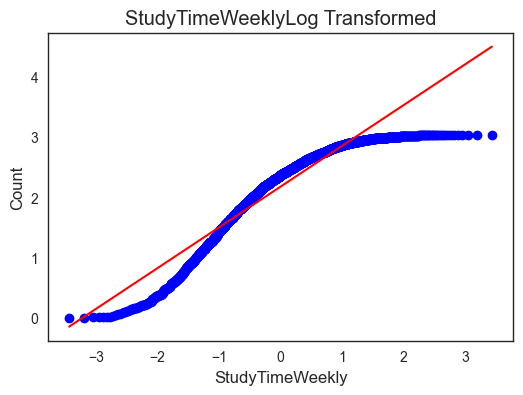

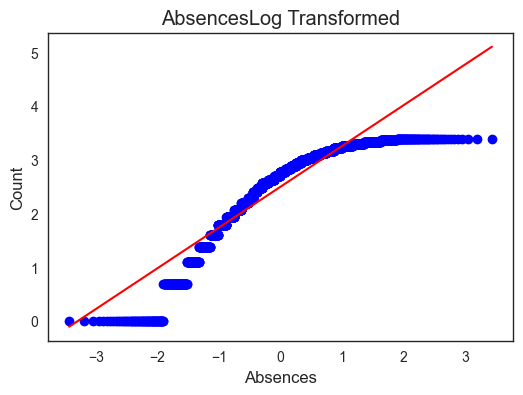

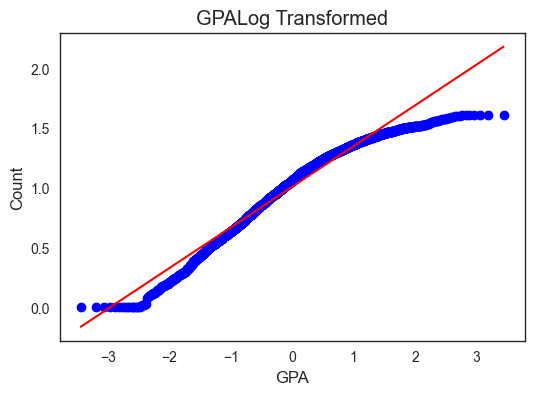

In [16]:
for feature in continuous_feature:
    data1 = df.copy()
    data1[feature] = np.log1p(data1[feature])
    #stats.probplot(df[feature], dist = "norm", plot = plt)
    stats.probplot(data1[feature], dist = "norm", plot = plt)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature + 'Log Transformed')
    plt.show()

After applying the Log transformations, the distributions doesn't normalize, rather they deviate more. Therefore, we will not apply Log or any other Function transformations

# MODEL BUILDING

In [17]:
df.columns


Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')

In [18]:
X = df.drop('GPA', axis = 1)
y = df['GPA']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape


((1913, 12), (479, 12))

### FEATURE SCALING USING COLUMN_TRANSFORMER

In [21]:

sc = StandardScaler()


In [22]:
preprocessor = ColumnTransformer([
    ('sscaler', sc, X.columns),
])

In [23]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_train_scaled.shape

(1913, 12)

In [24]:
X_test_scaled = preprocessor.transform(X_test)
X_test_scaled.shape

(479, 12)

## Setting up mlflow

In [3]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("student-grade-pre-experiment")  # mlflow will create this experiment if it is not already existed.


2024/07/21 00:56:35 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/07/21 00:56:35 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='/Users/parthrajauria/Documents/MYPersonalProjects/EndToEndMLOPsProject/experiment-tracking/mlruns/1', creation_time=1721503596119, experiment_id='1', last_update_time=1721503596119, lifecycle_stage='active', name='student-grade-pre-experiment', tags={}>

# MODEL TRAINING

In [4]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square



In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Adding the code for tracking experiemnts using mlflow 
    with mlflow.start_run():  # To start the run
        mlflow.set_tag("developer", "parth")

        mlflow.log_param("model name", model)

        model.fit(X_train_scaled, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')
        
        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)
        
        print('='*35)
        print('\n')

        # Logging in mlflow
        mlflow.log_metric("model_train_rmse",model_train_rmse)
        mlflow.log_metric("model_train_mae",model_train_mae)
        mlflow.log_metric("model_train_r2",model_train_r2)
        mlflow.log_metric("model_test_rmse",model_test_rmse)
        mlflow.log_metric("model_test_mae",model_test_mae)
        mlflow.log_metric("model_test_r2",model_test_r2)



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1962
- Mean Absolute Error: 0.1592
- R2 Score: 0.9541
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1966
- Mean Absolute Error: 0.1553
- R2 Score: 0.9532


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9163
- Mean Absolute Error: 0.7736
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9097
- Mean Absolute Error: 0.7660
- R2 Score: -0.0008


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1962
- Mean Absolute Error: 0.1592
- R2 Score: 0.9541
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1967
- Mean Absolute Error: 0.1553
- R2 Score: 0.9532


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3600
- Mean Absolute Error: 0.2908
- R2 Score: 0.8456
----------------------

In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]

    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

NameError: name 'LinearRegression' is not defined

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]

    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1962
- Mean Absolute Error: 0.1592
- R2 Score: 0.9541
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1966
- Mean Absolute Error: 0.1553
- R2 Score: 0.9532


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9163
- Mean Absolute Error: 0.7736
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9097
- Mean Absolute Error: 0.7660
- R2 Score: -0.0008


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1962
- Mean Absolute Error: 0.1592
- R2 Score: 0.9541
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1967
- Mean Absolute Error: 0.1553
- R2 Score: 0.9532


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3600
- Mean Absolute Error: 0.2908
- R2 Score: 0.8456
----------------------

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1962
- Mean Absolute Error: 0.1592
- R2 Score: 0.9541

Model performance for Test set
- Root Mean Squared Error: 0.1966
- Mean Absolute Error: 0.1553
- R2 Score: 0.9532

## ===================================


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9163
- Mean Absolute Error: 0.7736
- R2 Score: 0.0000

Model performance for Test set
- Root Mean Squared Error: 0.9097
- Mean Absolute Error: 0.7660
- R2 Score: -0.0008

## ===================================


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1962
- Mean Absolute Error: 0.1592
- R2 Score: 0.9541

Model performance for Test set
- Root Mean Squared Error: 0.1967
- Mean Absolute Error: 0.1553
- R2 Score: 0.9532
## ===================================


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3600
- Mean Absolute Error: 0.2908
- R2 Score: 0.8456

Model performance for Test set
- Root Mean Squared Error: 0.4615
- Mean Absolute Error: 0.3659
- R2 Score: 0.7425
## ===================================


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000

Model performance for Test set
- Root Mean Squared Error: 0.3392
- Mean Absolute Error: 0.2676
- R2 Score: 0.8609
## ===================================


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0903
- Mean Absolute Error: 0.0715
- R2 Score: 0.9903

Model performance for Test set
- Root Mean Squared Error: 0.2460
- Mean Absolute Error: 0.1907
- R2 Score: 0.9268
## ===================================


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0516
- Mean Absolute Error: 0.0371
- R2 Score: 0.9968

Model performance for Test set
- Root Mean Squared Error: 0.2398
- Mean Absolute Error: 0.1891
- R2 Score: 0.9305
## ===================================


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1167
- Mean Absolute Error: 0.0912
- R2 Score: 0.9838

Model performance for Test set
- Root Mean Squared Error: 0.2135
- Mean Absolute Error: 0.1696
- R2 Score: 0.9449
## ===================================


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2572
- Mean Absolute Error: 0.2094
- R2 Score: 0.9212

Model performance for Test set
- Root Mean Squared Error: 0.2625
- Mean Absolute Error: 0.2083
- R2 Score: 0.9167
## ===================================




# MODEL EVALUATION

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.953247
2,Ridge,0.953233
7,CatBoosting Regressor,0.944883
6,XGBRegressor,0.930452
5,Random Forest Regressor,0.926822
8,AdaBoost Regressor,0.916700
4,Decision Tree,0.860868
3,K-Neighbors Regressor,0.742481
1,Lasso,-0.000774


 CHOOSING THE BEST MODEL - LINEAR REGRESSION¶


In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train_scaled, y_train)
y_pred = lin_model.predict(X_test_scaled)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.32


* Linear Regression outperforms other Regression Models, achieving a good R2 Score of 0.95.
* As an additional step, we can perform Hyper-parameter tuning. The individual model results may improve but the overall results may not increase much from this stage.

# PREDICTION ON NEW DATA INSTANCE 

In [27]:
X_test_scaled[4]


array([ 1.37285117, -1.0291761 , -0.84616672, -1.78504629, -1.08250988,
        1.45955945, -0.65799605, -1.02021491, -0.78293347,  1.51039849,
       -0.49705784, -0.43041146])

In [28]:
lin_model.predict([[ 1.37285117, -1.0291761 , -0.84616672, -1.78504629, -1.08250988,
        1.45955945, -0.65799605, -1.02021491, -0.78293347,  1.51039849,
       -0.49705784, -0.43041146]])

array([0.25163087])

In [29]:
y_test[4:5]


435    0.248977
Name: GPA, dtype: float64